<a href="https://colab.research.google.com/github/prakarshjain28/DL_Activation_Project/blob/master/cifar10_using_fnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN using custom activation functions (CIFAR-10 dataset)

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training our model will take just a few lines of code.


### Import TensorFlow

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains `60,000 color images` in `10 classes`, with 6,000 images in each class. The dataset is divided into `50,000 training images` and `10,000 testing images`.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


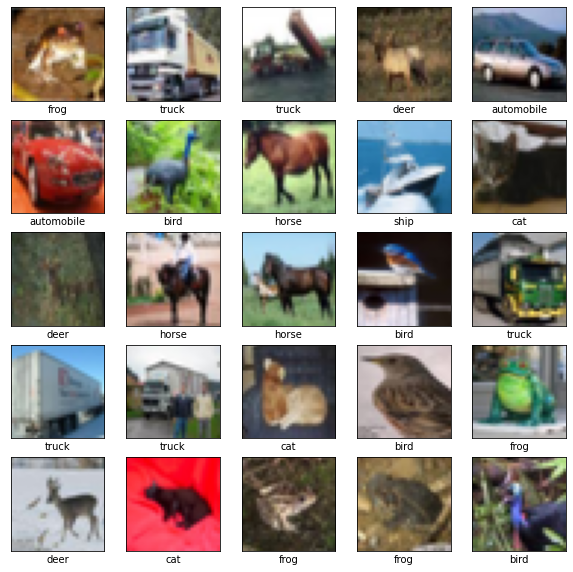

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Custom Activation Functions**


In [0]:
def sin_act(x):
  return tf.math.sin(x, name=None)

def softPlus(x):
  return tf.math.log(1.0 + tf.math.exp(x, name=None))

def arcTan(x):
  return tf.math.atan(x)

def bentIdentity(x):
  return ((tf.math.sqrt(x**2+1) - 1.0)/2.0 + x)

def custom_1(x):
  return tf.math.log(1.0 + (tf.math.exp(x) / (1.0 + tf.math.exp(x))))

def custom_2(x):
  return ((tf.math.sqrt(x**2+1) - 1.0) / 2.0 + 0.5*x)

def custom_3(x):
  return ((tf.math.log(tf.math.sin(x)**2+2) - 1.0) )

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten,Dropout
def createConvolutionalBase(activationFunction):
    
    model = keras.Sequential([
      keras.layers.Flatten(input_shape=(32, 32,3)),
      keras.layers.Dense(128, activation=activationFunction),
      keras.layers.Dense(64, activation=activationFunction),
      keras.layers.Dense(10)
    ])
    return model

Let's display the architecture of our model so far.

In [0]:
# model = createConvolutionalBase(sin_act)
# model.summary()

### Add Dense layers on top
![alt text](https://raw.githubusercontent.com/rahuldkjain/classification-using-custom-activation-functions/master/assets/cnn-cifar-complete.png)

Here's the complete architecture of our model.

In [0]:
# addDenseLayerOnTop(model, sin_act)
# model.summary()

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [0]:
def compileAndTrainModel(model, epochs):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=epochs, 
                      validation_data=(test_images, test_labels))
  return history

In [0]:
# history = compileAndTrainModel(model)

 ### Plot

In [0]:
def plot(history, title, type_1, type_2, yLabel):
  plt.plot(history.history[type_1], label=type_1)
  plt.plot(history.history[type_2], label = type_2)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel(yLabel)
  plt.ylim([0, 0.9])
  plt.legend(loc='lower right')

### Evaluate the model

In [0]:
def evaluateModel(model, history):
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  return test_loss, test_acc

In [0]:
def run(activationFunction, epochs):
  print('***************************'+ str(activationFunction) + ' ACTIVATION FUNCTION**********************')
  model = createConvolutionalBase(activationFunction)

  

  history = compileAndTrainModel(model, epochs)
  test_loss, test_acc = evaluateModel(model, history)

  print('Test Accuracy -> '+str((test_acc)*100)+'%')
  print('Test Loss -> '+str(test_loss)+'%')
  
  return history

### Let's test the CNN model with custom Activation Functions

#### Sigmoid Activation

***************************sigmoid ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9307 - accuracy: 0.3004 - val_loss: 1.7950 - val_accuracy: 0.3654
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7805 - accuracy: 0.3619 - val_loss: 1.7579 - val_accuracy: 0.3583
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7260 - accuracy: 0.3778 - val_loss: 1.7007 - val_accuracy: 0.3886
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6958 - accuracy: 0.3910 - val_loss: 1.6833 - val_accuracy: 0.3988
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6690 - accuracy: 0.4007 - val_loss: 1.6660 - val_accuracy: 0.4037
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6472 - accuracy: 0.4085 - val_loss: 1.6377 - val_accuracy: 0.4117
Epoch 7/10
1563/1563 [==============================] - 4s 

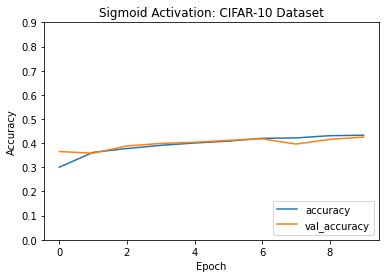

In [13]:
sigmoidHistory = run('sigmoid', 10)
plot(sigmoidHistory, 'Sigmoid Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### ReLU Activation

***************************relu ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9016 - accuracy: 0.3144 - val_loss: 1.8110 - val_accuracy: 0.3483
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7100 - accuracy: 0.3854 - val_loss: 1.6985 - val_accuracy: 0.3845
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6278 - accuracy: 0.4154 - val_loss: 1.6148 - val_accuracy: 0.4144
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5863 - accuracy: 0.4323 - val_loss: 1.5765 - val_accuracy: 0.4397
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5590 - accuracy: 0.4421 - val_loss: 1.6499 - val_accuracy: 0.4199
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5333 - accuracy: 0.4501 - val_loss: 1.5108 - val_accuracy: 0.4639
Epoch 7/10
1563/1563 [==============================] - 4s 3ms

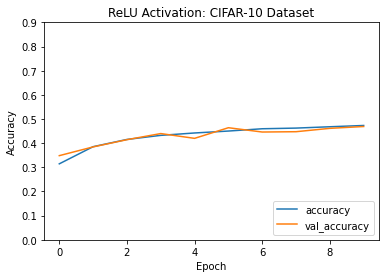

In [14]:
reluHistory = run('relu', 10)
plot(reluHistory, 'ReLU Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### Tanh Activation

***************************tanh ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9870 - accuracy: 0.2665 - val_loss: 1.9591 - val_accuracy: 0.2727
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8927 - accuracy: 0.3113 - val_loss: 1.8617 - val_accuracy: 0.3228
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8605 - accuracy: 0.3289 - val_loss: 1.8675 - val_accuracy: 0.3390
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8365 - accuracy: 0.3374 - val_loss: 1.7969 - val_accuracy: 0.3565
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8132 - accuracy: 0.3464 - val_loss: 1.7831 - val_accuracy: 0.3526
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7942 - accuracy: 0.3577 - val_loss: 1.7961 - val_accuracy: 0.3470
Epoch 7/10
1563/1563 [==============================] - 4s 3ms

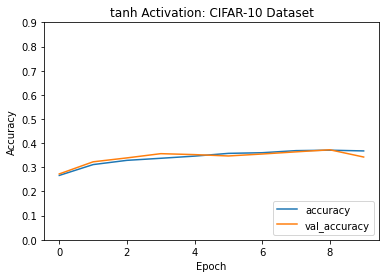

In [15]:
tanhHistory = run('tanh', 10)
plot(tanhHistory, 'tanh Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### arcTan Activation

***************************<function arcTan at 0x7f9fde545598> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9366 - accuracy: 0.2965 - val_loss: 1.8582 - val_accuracy: 0.3227
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8093 - accuracy: 0.3484 - val_loss: 1.8091 - val_accuracy: 0.3556
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7492 - accuracy: 0.3689 - val_loss: 1.7359 - val_accuracy: 0.3705
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7073 - accuracy: 0.3853 - val_loss: 1.7028 - val_accuracy: 0.3895
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6841 - accuracy: 0.3921 - val_loss: 1.7460 - val_accuracy: 0.3778
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6633 - accuracy: 0.4042 - val_loss: 1.6454 - val_accuracy: 0.4095
Epoch 7/10
1563/1563 [=========

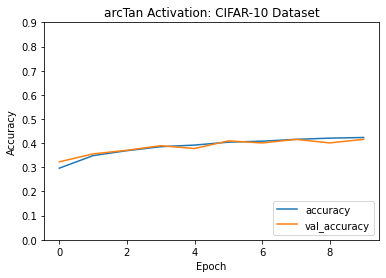

In [16]:
arcTanHistory = run(arcTan, 10)
plot(arcTanHistory, 'arcTan Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### Custom-1 Activation

***************************<function custom_1 at 0x7f9fde5456a8> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9814 - accuracy: 0.2777 - val_loss: nan - val_accuracy: 0.3439
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1193 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 4s 3ms

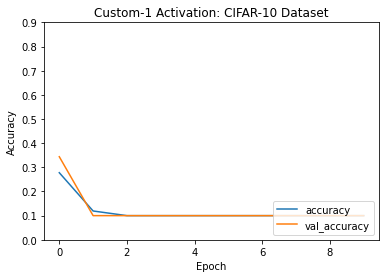

In [17]:
custom_1_History = run(custom_1, 10)
plot(custom_1_History, 'Custom-1 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

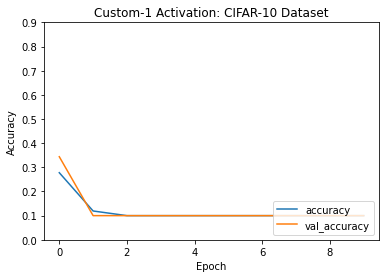

In [18]:
plot(custom_1_History, 'Custom-1 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### Custom-2 Activation

***************************<function custom_2 at 0x7f9fde545730> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8487 - accuracy: 0.3340 - val_loss: 1.7014 - val_accuracy: 0.3962
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6682 - accuracy: 0.4009 - val_loss: 1.5940 - val_accuracy: 0.4310
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5907 - accuracy: 0.4305 - val_loss: 1.5653 - val_accuracy: 0.4370
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5376 - accuracy: 0.4499 - val_loss: 1.5195 - val_accuracy: 0.4554
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4992 - accuracy: 0.4638 - val_loss: 1.5501 - val_accuracy: 0.4498
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4679 - accuracy: 0.4752 - val_loss: 1.4711 - val_accuracy: 0.4749
Epoch 7/10
1563/1563 [=======

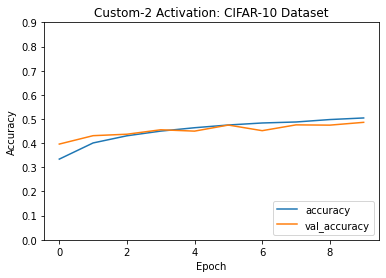

In [19]:
custom_2_History = run(custom_2, 10)
plot(custom_2_History, 'Custom-2 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

***************************<function custom_3 at 0x7f9fde5457b8> ACTIVATION FUNCTION**********************
Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.2688 - accuracy: 0.1341 - val_loss: 2.3186 - val_accuracy: 0.0987
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3083 - accuracy: 0.1008 - val_loss: 2.3055 - val_accuracy: 0.1042
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3064 - accuracy: 0.0999 - val_loss: 2.3054 - val_accuracy: 0.0990
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3062 - accuracy: 0.0985 - val_loss: 2.3054 - val_accuracy: 0.0964
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3057 - accuracy: 0.0986 - val_loss: 2.3051 - val_accuracy: 0.1058
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 2.3055 - accuracy: 0.0993 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [=======

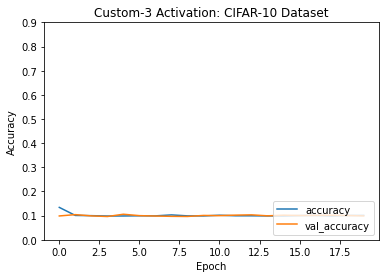

In [21]:
custom_3_History = run(custom_3, 20)
plot(custom_3_History, 'Custom-3 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

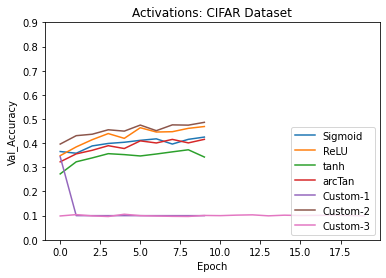

In [22]:
plt.plot(sigmoidHistory.history['val_accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_accuracy'], label='ReLU')
plt.plot(tanhHistory.history['val_accuracy'], label='tanh')
plt.plot(arcTanHistory.history['val_accuracy'], label='arcTan')
plt.plot(custom_1_History.history['val_accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['val_accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['val_accuracy'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.ylim([0, 0.9])
plt.legend(loc='lower right')


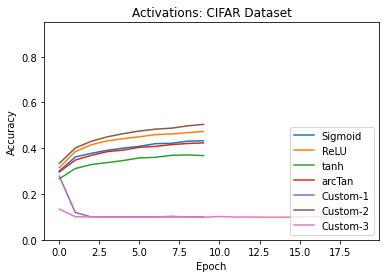

In [23]:
plt.plot(sigmoidHistory.history['accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['accuracy'], label='ReLU')
plt.plot(tanhHistory.history['accuracy'], label='tanh')
plt.plot(arcTanHistory.history['accuracy'], label='arcTan')
plt.plot(custom_1_History.history['accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['accuracy'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.95])
plt.legend(loc='lower right')

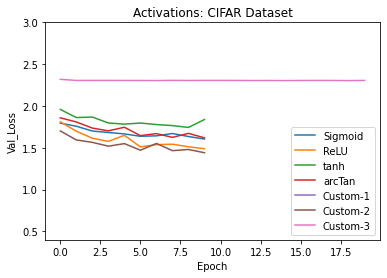

In [31]:
plt.plot(sigmoidHistory.history['val_loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_loss'], label='ReLU')
plt.plot(tanhHistory.history['val_loss'], label='tanh')
plt.plot(arcTanHistory.history['val_loss'], label='arcTan')
plt.plot(custom_1_History.history['val_loss'], label='Custom-1')
plt.plot(custom_2_History.history['val_loss'], label='Custom-2')
plt.plot(custom_3_History.history['val_loss'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Loss')
plt.ylim([0.4, 3])
plt.legend(loc='lower right')

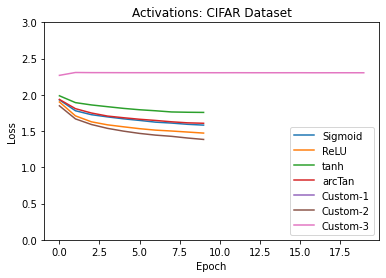

In [30]:
plt.plot(sigmoidHistory.history['loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['loss'], label='ReLU')
plt.plot(tanhHistory.history['loss'], label='tanh')
plt.plot(arcTanHistory.history['loss'], label='arcTan')
plt.plot(custom_1_History.history['loss'], label='Custom-1')
plt.plot(custom_2_History.history['loss'], label='Custom-2')
plt.plot(custom_3_History.history['loss'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')